In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from columns_to_keep import C2K
from type_to_fix import T2F

In [2]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'datadump-20150801-20171219.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name)
display(df.shape)

(63265, 111)

In [3]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

In [4]:
data_file_name = 'tiny_yup_messages_preprocessed.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
dfd = pd.read_csv(full_data_file_name)
display(dfd.shape)

(7441, 6)

Analizar la cantidad de palabras promedio de los turnos de los estudiantes dentro de un diálogo en general, para los diálogos evaluados como positivos (4, 5), y para los diálogos evaluados como negativos (1, 2). ¿La diferencia es significativa entre diálogos positivos y negativos? Correlacionar esta variable con la "nota" que el estudiante pone al tutor en ese diálogo.

In [5]:
dfd['twlen'] = dfd.text.apply(lambda x: len(x))
dialogos = dfd[['session_id', 'sent_from','twlen']]
dialogos = dialogos[dialogos.sent_from=='student']
dialogos = dialogos.groupby(['session_id','sent_from']).mean()
dialogos = dialogos.reset_index()

dialogos['student_rating'] = dialogos['session_id'].apply(lambda x:df[df.session_id==x].student_rating.values[0])
dialogos['feedback_score'] = dialogos['session_id'].apply(lambda x:df[df.session_id==x].feedback_score.values[0])
dialogos = dialogos.dropna()
dialogos

,session_id,sent_from,twlen,student_rating,feedback_score
0,300142,student,24.375000,3,0.9
4,300602,student,52.500000,2,0.0
6,300833,student,8.000000,3,0.9
8,300940,student,26.222222,5,0.8
10,301010,student,49.227273,5,0.8
...,...,...,...,...,...
252,325522,student,88.842105,5,1.0
253,325796,student,25.800000,5,0.0
254,325896,student,33.000000,5,0.0
255,326034,student,37.500000,5,0.0


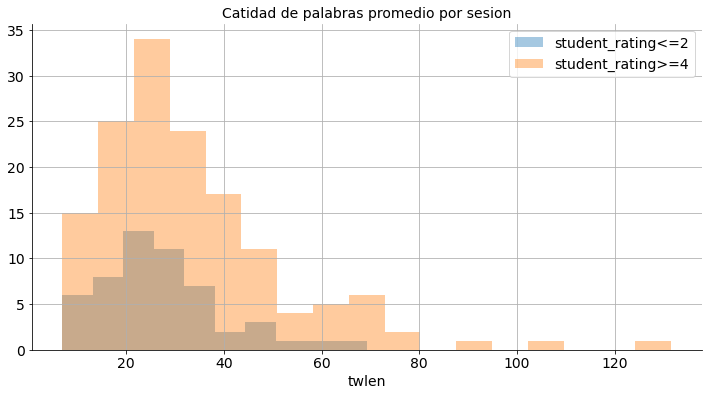

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(dialogos[dialogos.student_rating<=2].twlen, kde=False, label='student_rating<=2')
sns.distplot(dialogos[dialogos.student_rating>=4].twlen, kde=False, label='student_rating>=4')
plt.legend(fontsize=14)
plt.grid(True)
plt.title("Catidad de palabras promedio por sesion", fontsize=14)
plt.xlabel('twlen', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

<Figure size 432x288 with 0 Axes>

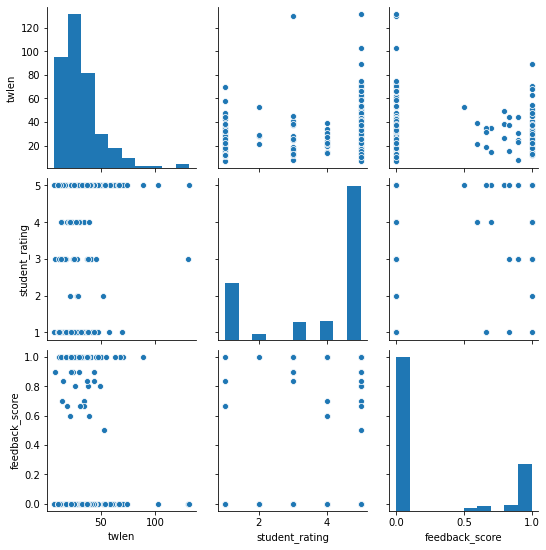

In [7]:
plt.figure()
sns.pairplot(dialogos[['twlen','student_rating','feedback_score']])

~~Analizar la cantidad de turnos del estudiante y el largo de los diálogos.~~

Correlacionar esta variable con la "nota" del diálogo. 

Calcular el promedio de cantidad de turnos para los diálogos positivos y negativos. ¿La diferencia es significativa?

In [10]:
turnos = dfd[dfd.sent_from=='student'].groupby(['session_id']).sent_from.value_counts()
turnos = pd.DataFrame(turnos)
turnos.columns=['n_turnos']
turnos.reset_index(inplace=True)
turnos['id'] = turnos[['session_id']].apply(lambda x: df[df.session_id==x.session_id].student_id.values[0], axis=1)
turnos = turnos.groupby(['id', 'session_id']).sum()
turnos.reset_index(inplace=True)
# turnos

In [15]:
tmp = dfd.session_id.value_counts()
turnos['dialog_len'] = turnos.session_id.apply(lambda x:tmp.loc[x])
turnos['student_rating'] = turnos.session_id.apply(lambda x:df[df.session_id==x].student_rating.values[0])
turnos

,id,session_id,n_turnos,dialog_len,student_rating
0,8122,320714,7,20,5
1,11854,310771,16,28,2
2,25366,309880,11,31,5
3,26804,322677,5,14,1
4,94155,311518,6,33,5
...,...,...,...,...,...
252,512565,324799,6,21,5
253,513304,324862,12,32,1
254,515028,325223,7,24,1
255,516674,325506,5,12,5


In [18]:
avp = turnos[turnos.student_rating>=4].n_turnos.mean()
avn = turnos[turnos.student_rating>=2].n_turnos.mean()

display(f'Promedio de turnos calificaciones positivas: {avp}')
display(f'Promedio de turnos calificaciones negativas: {avn}')
display(f'Diferencia {abs(avp-avn)}')

'Promedio de turnos calificaciones positivas: 11.575342465753424'

'Promedio de turnos calificaciones negativas: 11.317365269461078'

'Diferencia 0.2579771962923463'